In [81]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [82]:
md = pd.read_csv('tables/md.csv')
md85 = md.iloc[:, [0,1,2]]
md87 = md.iloc[:, [0,3,4]]


# print(md85.to_latex(index = False, column_format= "c c c", decimal=',')) 
# print(md87.to_latex(index = False, column_format= "c c c", decimal=',')) 

# df = {'f/kHz': f, 'I_1/mA': I_1, 'I_1h/mA': I_1h, 'I_2/mA': I_2,'I_2h/mA': I_2h} 
# df = pd.DataFrame(data = df)

print(md.to_latex(index = False, column_format= "c c c c c", decimal=','))

\begin{tabular}{c c c c c}
\toprule
 f/kHz &  I\_1/mA &  I\_1H/mA &  I\_2/mA &  I\_2H/mA \\
\midrule
   100 &     660 &        0 &     764 &        0 \\
   200 &     652 &       16 &     888 &       16 \\
   300 &     486 &       44 &     842 &       44 \\
   400 &     409 &       66 &     883 &       66 \\
   500 &     375 &       84 &     967 &       84 \\
   600 &     224 &      112 &     938 &      112 \\
   700 &     164 &      132 &     993 &      132 \\
   800 &     295 &      140 &     629 &      184 \\
   900 &     269 &      158 &     357 &      226 \\
  1000 &     590 &      158 &     586 &      236 \\
\bottomrule
\end{tabular}



Magnetische Flussdichten berechnen:

In [83]:
np.savetxt('md.txt', md.values, fmt='%.2f')
f, I_1, I_1h, I_2, I_2h = np.genfromtxt('md.txt', unpack=True, skip_header=0)

# Helmholtz
def B(I, N, A):
    mu_0 = const.mu_0
    return mu_0 * 8 * I * N / (np.sqrt(125) * A)

A_S = 0.1639
A_H = 0.1579
N_S = 11
N_H = 154

B1 = B(I_1, N_S, A_S)
B1h = B(I_1h, N_H, A_H)
B2 = B(I_2, N_S, A_S)
B2h = B(I_2h, N_H, A_H)

B1 += B1h
B2 += B2h   # 1e-3 * Tesla

df = {'f/kHz': f, 'I_1/mA': I_1, 'I_1h/mA': I_1h, 'B1/mikroT': np.round(B1*1e3, 2), 'I_2/mA': I_2,'I_2h/mA': I_2h, 'B2/mikroT': np.round(B2*1e3, 2)} 
df = pd.DataFrame(data = df)

print(df.to_latex(index = False, column_format= "c c c c c c c", decimal=','))

\begin{tabular}{c c c c c c c}
\toprule
 f/kHz &  I\_1/mA &  I\_1h/mA &  B1/mikroT &  I\_2/mA &  I\_2h/mA &  B2/mikroT \\
\midrule
 100,0 &   660,0 &      0,0 &      39,83 &   764,0 &      0,0 &      46,11 \\
 200,0 &   652,0 &     16,0 &      53,38 &   888,0 &     16,0 &      67,62 \\
 300,0 &   486,0 &     44,0 &      67,92 &   842,0 &     44,0 &      89,40 \\
 400,0 &   409,0 &     66,0 &      82,56 &   883,0 &     66,0 &     111,17 \\
 500,0 &   375,0 &     84,0 &      96,30 &   967,0 &     84,0 &     132,02 \\
 600,0 &   224,0 &    112,0 &     111,74 &   938,0 &    112,0 &     154,83 \\
 700,0 &   164,0 &    132,0 &     125,66 &   993,0 &    132,0 &     175,68 \\
 800,0 &   295,0 &    140,0 &     140,58 &   629,0 &    184,0 &     199,32 \\
 900,0 &   269,0 &    158,0 &     154,79 &   357,0 &    226,0 &     219,74 \\
1000,0 &   590,0 &    158,0 &     174,17 &   586,0 &    236,0 &     242,33 \\
\bottomrule
\end{tabular}



lineare Augleichsrechnung:

In [84]:
# Ausgleichsfunktion
def g(x, a, b):
    return a * x + b

para, pcov = curve_fit(g, f, B1)    # 1e-9 Tesla
pcov = np.sqrt(np.diag(pcov))
a1, b1 = para
fa1, fb1 = pcov 

ua1 = ufloat(a1, fa1) 
ub1 = ufloat(b1, fb1) 

print('a85 = (%.5f ± %.5f)' % (noms(ua1), stds(ua1)), 'T*10^-9 /Hz^-1')
print('b85 = (%.3f ± %.3f)' % (noms(ub1), stds(ub1)), 'T*10^-9')

para, pcov = curve_fit(g, f, B2)    # 1e-9 Tesla
pcov = np.sqrt(np.diag(pcov))
a2, b2 = para
fa2, fb2 = pcov 

ua2 = ufloat(a2, fa2) 
ub2 = ufloat(b2, fb2) 

print('a87 = (%f ± %f)' % (noms(ua2), stds(ua2)), 'T*10^-9 /Hz^-1')
print('b87 = (%f ± %f)' % (noms(ub2), stds(ub2)), 'T*10^-9')

a85 = (0.00015 ± 0.00000) T*10^-9 /Hz^-1
b85 = (0.024 ± 0.001) T*10^-9
a87 = (0.000218 ± 0.000001) T*10^-9 /Hz^-1
b87 = (0.023928 ± 0.000418) T*10^-9


Plot erstellen:

0.0238+/-0.0010
0.0239+/-0.0004


TypeError: 'AffineScalarFunc' object is not iterable

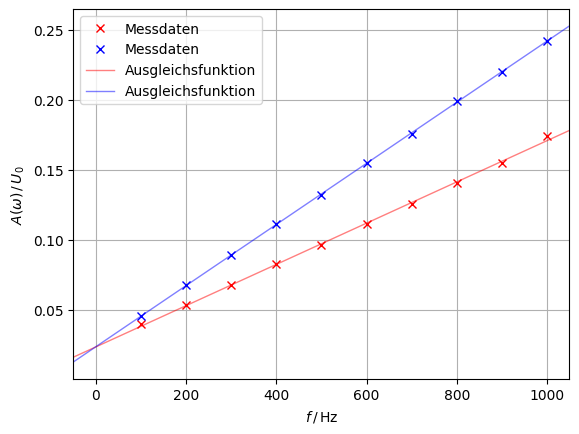

In [85]:
# plt.figure(figsize=(9, 6)) 

plt.plot(f, B1, 'xr', markersize=6 , label = 'Messdaten', alpha=1)
plt.plot(f, B2, 'xb', markersize=6 , label = 'Messdaten', alpha=1)

xx = np.linspace(-50, 1050, 10**4)

plt.plot(xx, g(xx, a1, b1), '-r', linewidth = 1, label = 'Ausgleichsfunktion', alpha = 0.5)
plt.plot(xx, g(xx, a2, b2), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha = 0.5)

plt.xlabel(r'$f \, / \, \mathrm{Hz}$')
plt.ylabel(r'$A(\omega) \, / \, U_0$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(-50, 1050)                   # limitation of visible scale in plot

c1 = g(0, ua1, ub1); print(c1)
c2 = g(0, ua2, ub2); print(c2)

np.median(c1, c2)